In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [44]:
# Load the dataset
df = pd.read_csv('titanic.csv')

In [45]:
df.head()     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# Drop irrelevant columns or columns with too many missing values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [47]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [49]:
df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [51]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [52]:
print("Unique values in 'Sex':", df['Sex'].unique())
print("Unique values in 'Embarked':", df['Embarked'].unique())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Unique values in 'Sex': ['male' 'female']
Unique values in 'Embarked': ['S' 'C' 'Q']
Missing values:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## Imputation

In [53]:
from sklearn.impute import SimpleImputer, KNNImputer

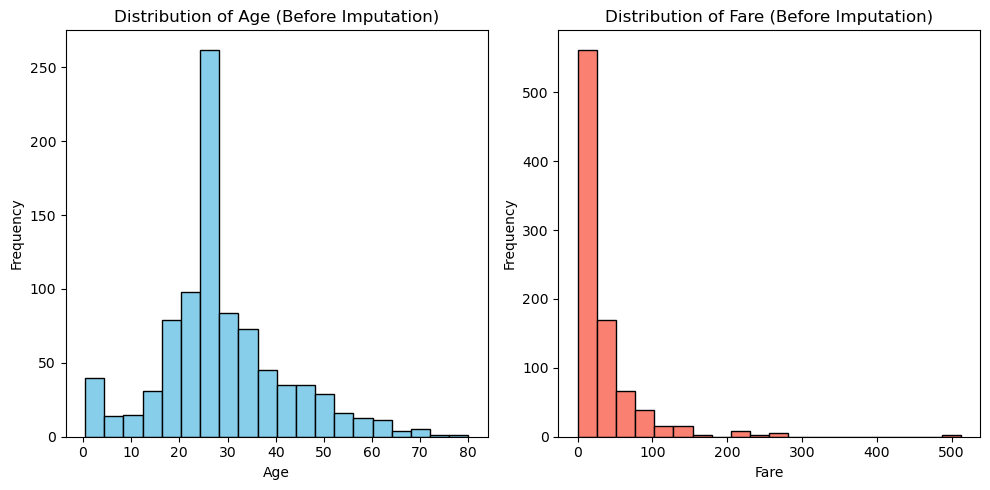

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age (Before Imputation)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Fare'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Fare (Before Imputation)')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [106]:
sim = SimpleImputer(missing_values=0, strategy='median')

In [107]:
simdf=sim.fit_transform(df)

In [108]:
simdf

array([[22.    ,  7.25  ,  1.    , ...,  1.    ,  1.    ,  1.    ],
       [38.    , 71.2833,  1.    , ...,  1.    ,  1.    ,  1.    ],
       [26.    ,  7.925 ,  1.    , ...,  1.    ,  1.    ,  1.    ],
       ...,
       [28.    , 23.45  ,  1.    , ...,  1.    ,  1.    ,  1.    ],
       [26.    , 30.    ,  1.    , ...,  1.    ,  1.    ,  1.    ],
       [32.    ,  7.75  ,  1.    , ...,  1.    ,  1.    ,  1.    ]])

In [109]:
kdf = KNNImputer(missing_values=0,n_neighbors=5,weights='uniform')

In [110]:
kdf.fit_transform(df)

array([[22.    ,  7.25  ,  1.    , ...,  1.    ,  1.    ,  1.    ],
       [38.    , 71.2833,  1.    , ...,  1.    ,  1.    ,  1.    ],
       [26.    ,  7.925 ,  1.    , ...,  1.    ,  1.    ,  1.    ],
       ...,
       [28.    , 23.45  ,  1.    , ...,  1.    ,  1.    ,  1.    ],
       [26.    , 30.    ,  1.    , ...,  1.    ,  1.    ,  1.    ],
       [32.    ,  7.75  ,  1.    , ...,  1.    ,  1.    ,  1.    ]])

In [39]:
# Transform the data
df[['Age', 'Fare']] = imputer.transform(df[['Age', 'Fare']])

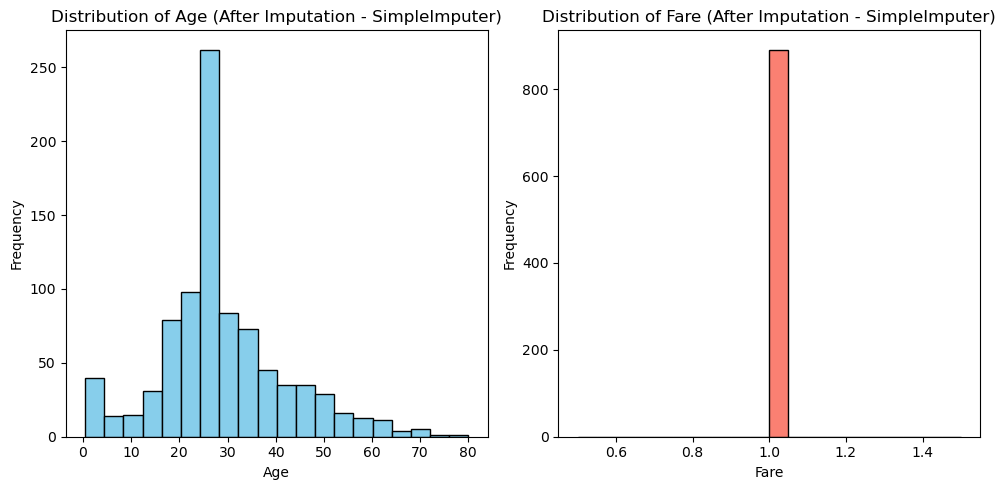

In [115]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(simdf[:, 0], bins=20, color='skyblue', edgecolor='black')  # Assuming 'Age' is the first column after imputation
plt.title('Distribution of Age (After Imputation - SimpleImputer)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(simdf[:, 5], bins=20, color='salmon', edgecolor='black')  # Assuming 'Fare' is the sixth column after imputation
plt.title('Distribution of Fare (After Imputation - SimpleImputer)')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Encoding:


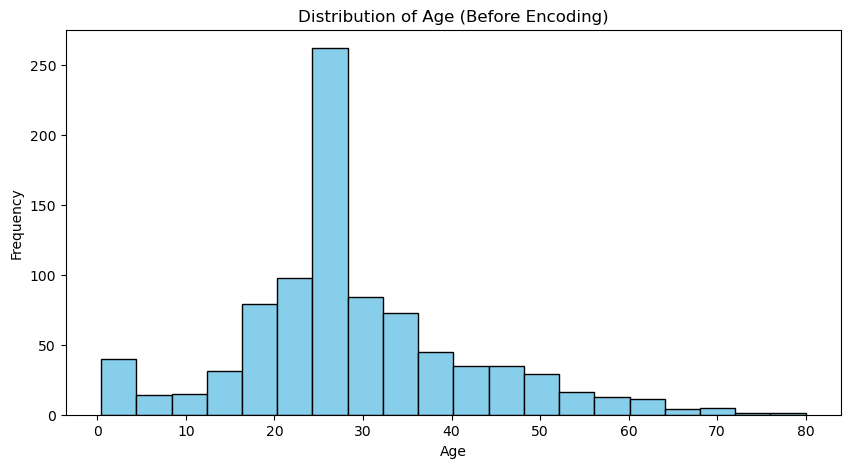

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age (Before Encoding)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [86]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
     

In [87]:

odf = OneHotEncoder(sparse_output=False)
odf

OneHotEncoder(sparse_output=False)

In [88]:
df['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [89]:

encod = odf.fit_transform(df['Age'].values.reshape(-1, 1))

In [90]:
print(odf.fit_transform(df['Age'].values.reshape(-1, 1)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [91]:
odf.get_feature_names_out()

array(['x0_0.42', 'x0_0.67', 'x0_0.75', 'x0_0.83', 'x0_0.92', 'x0_1.0',
       'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0',
       'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0', 'x0_12.0', 'x0_13.0',
       'x0_14.0', 'x0_14.5', 'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0',
       'x0_19.0', 'x0_20.0', 'x0_20.5', 'x0_21.0', 'x0_22.0', 'x0_23.0',
       'x0_23.5', 'x0_24.0', 'x0_24.5', 'x0_25.0', 'x0_26.0', 'x0_27.0',
       'x0_28.0', 'x0_28.5', 'x0_29.0', 'x0_30.0', 'x0_30.5', 'x0_31.0',
       'x0_32.0', 'x0_32.5', 'x0_33.0', 'x0_34.0', 'x0_34.5', 'x0_35.0',
       'x0_36.0', 'x0_36.5', 'x0_37.0', 'x0_38.0', 'x0_39.0', 'x0_40.0',
       'x0_40.5', 'x0_41.0', 'x0_42.0', 'x0_43.0', 'x0_44.0', 'x0_45.0',
       'x0_45.5', 'x0_46.0', 'x0_47.0', 'x0_48.0', 'x0_49.0', 'x0_50.0',
       'x0_51.0', 'x0_52.0', 'x0_53.0', 'x0_54.0', 'x0_55.0', 'x0_55.5',
       'x0_56.0', 'x0_57.0', 'x0_58.0', 'x0_59.0', 'x0_60.0', 'x0_61.0',
       'x0_62.0', 'x0_63.0', 'x0_64.0', 'x0_65.0', 'x0_66.0'

In [92]:
encoded_df = pd.DataFrame(encod, columns=odf.get_feature_names_out())

,x0_0.42,x0_0.67,x0_0.75,x0_0.83,x0_0.92,x0_1.0,x0_2.0,x0_3.0,x0_4.0,x0_5.0,...,x0_62.0,x0_63.0,x0_64.0,x0_65.0,x0_66.0,x0_70.0,x0_70.5,x0_71.0,x0_74.0,x0_80.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


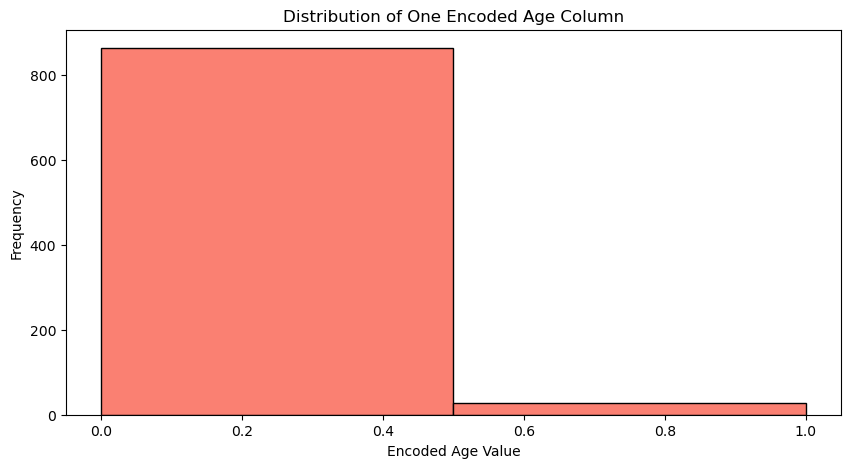

In [102]:
plt.figure(figsize=(10, 5))
plt.hist(encoded_df['x0_22.0'], bins=2, color='salmon', edgecolor='black')  # Replace 'x0_22.0' with one of the encoded columns
plt.title('Distribution of One Encoded Age Column')
plt.xlabel('Encoded Age Value')
plt.ylabel('Frequency')
plt.show()


## Scaling

In [129]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df_scaled = df.copy()  # Create a copy of the DataFrame to keep the original data
df_scaled[['Age', 'Fare']] = scaler.fit_transform(df_scaled[['Age', 'Fare']])


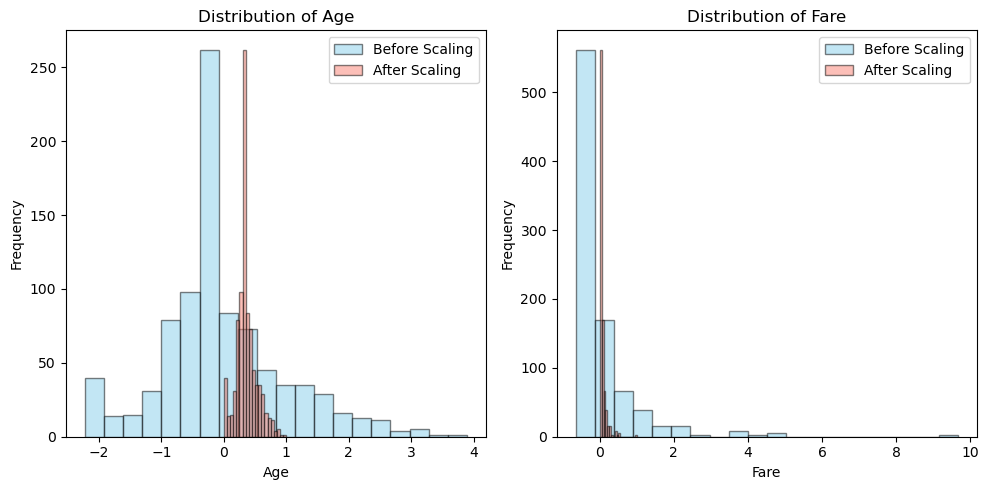

In [134]:
##Before and After Visualization using Min-Max Scaling:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Before Scaling')
plt.hist(df_scaled['Age'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='After Scaling')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['Fare'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Before Scaling')
plt.hist(df_scaled['Fare'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='After Scaling')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


## Column Transformers

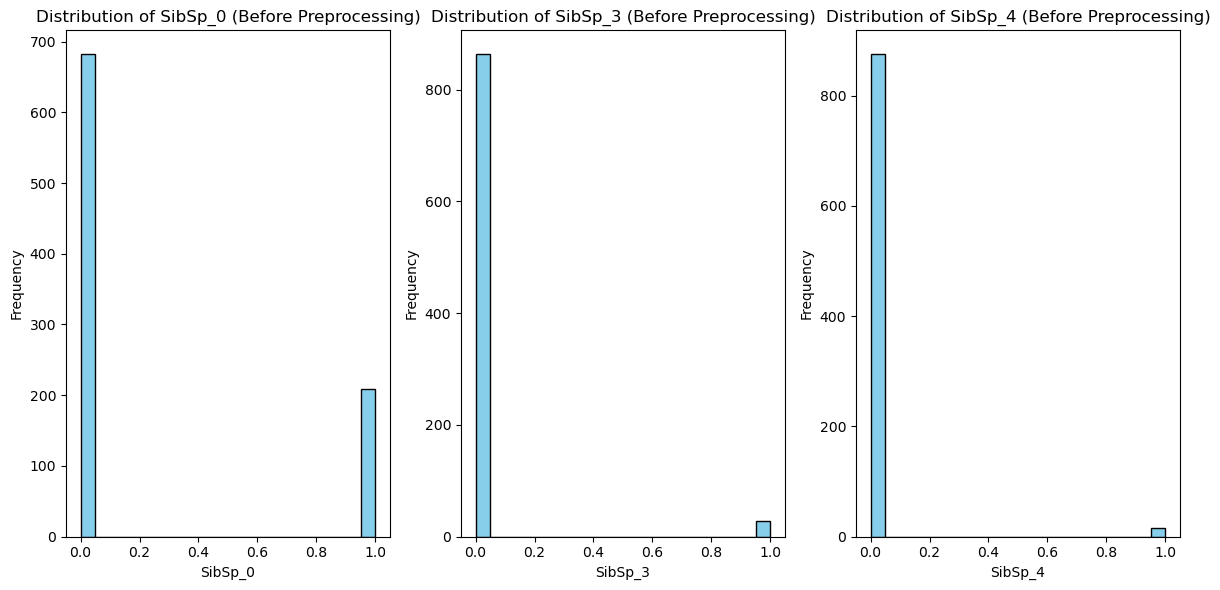

In [152]:
import matplotlib.pyplot as plt

encoded_columns = ['SibSp_0', 'SibSp_3', 'SibSp_4']

plt.figure(figsize=(12, 6))
for i, col in enumerate(encoded_columns, start=1):
    plt.subplot(1, 3, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col} (Before Preprocessing)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the columns and transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'), ['Age', 'Fare']),
        ('scaler', StandardScaler(), ['Age', 'Fare', 'SibSp_0', 'SibSp_3', 'SibSp_4', 'SibSp_2', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_5', 'Parch_3', 'Parch_4', 'Parch_6'])  
    ],
    remainder='passthrough'  # Pass through any non-numerical columns without transformation
)

# Fit and transform the data
data_processed = preprocessor.fit_transform(df)


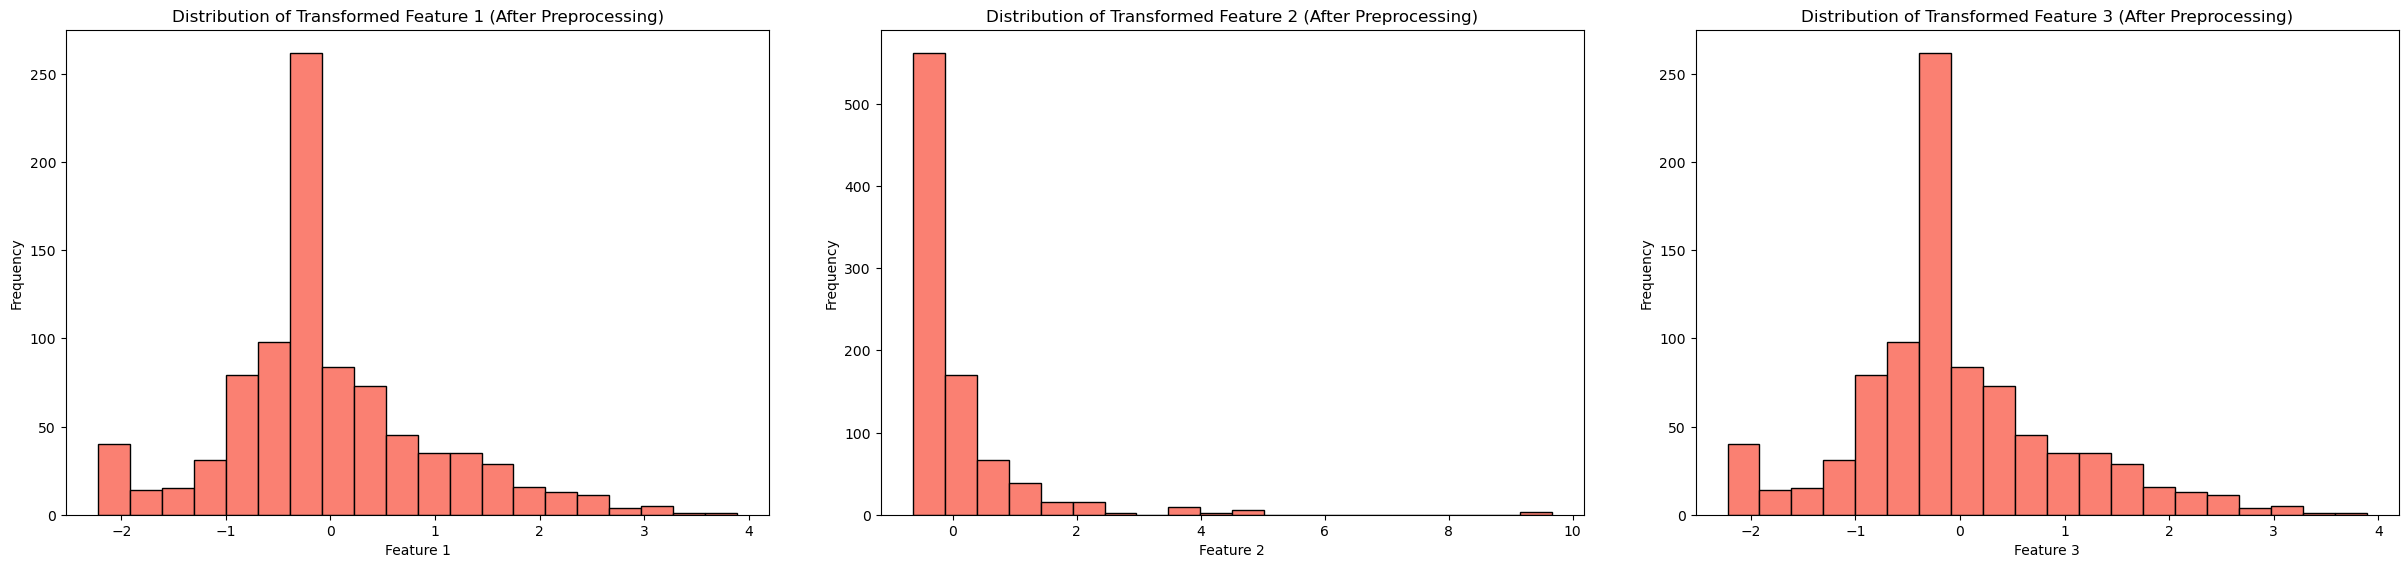

In [161]:
plt.figure(figsize=(25, 12))
for i, col in enumerate(encoded_columns, start=1):
    plt.subplot(2, 3, i)
    plt.hist(data_processed[:, i-1], bins=20, color='salmon', edgecolor='black')
    plt.title(f'Distribution of Transformed Feature {i} (After Preprocessing)')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Frequency')

plt.tight_layout(pad=4)
plt.show()
